In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [3]:
from typing import Dict
from acctrack.io.athena_raw_root import AthenaRawRootReader
from acctrack.tools.analyze_track_data import TrackAnalyzer
from acctrack.utils.utils_plot import add_mean_std, create_figure
from acctrack.io import utils_athena_raw_root as utils_raw_root
from acctrack.task.convert_gnn_tracks_for_fitting import ConvertGNNTracksForFitting

import awkward as ak
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
bug_fixed_2023_data_dir = "/media/DataOcean/data/ITk/BugFixedSamples"
bug_fixed_2023_filename = bug_fixed_2023_data_dir + "/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3770_s3773_r14429__J001.root"

redumped_2022_data_dir = "/media/DataOcean/data/ITk/ReDumped2022Data"
redumped_2022_filename = redumped_2022_data_dir + "/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J006.root"

new_dumped_2023_uncorrdata_dir = "/media/DataOcean/data/ITk/2023_uncorr_RDO_dumped/"
new_dumped_2023_uncorrdata_filename = new_dumped_2023_uncorrdata_dir + "GNN4Itk_v2__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3770_s3773_r14431__J001.root"

In [70]:
bug_fixed_2023_reader = AthenaRawRootReader(bug_fixed_2023_data_dir)
redumped_2022_reader = AthenaRawRootReader(redumped_2022_data_dir)

/media/DataOcean/data/ITk/BugFixedSamples contains  1 files and total 200 events.
Error reading file: /media/DataOcean/data/ITk/ReDumped2022Data/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J052.root
/media/DataOcean/data/ITk/ReDumped2022Data contains  6 files and total 3000 events.


In [14]:
new_dumped_2023_reader = AthenaRawRootReader(new_dumped_2023_uncorrdata_dir)

/media/DataOcean/data/ITk/2023_uncorr_RDO_dumped contains  1 files and total 200 events.


In [15]:
tree = new_dumped_2023_reader.read_file(max_evts=2)

Reading file: /media/DataOcean/data/ITk/2023_uncorr_RDO_dumped/GNN4Itk_v2__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3770_s3773_r14431__J001.root
Reaching the maximum 2 events. Stop.


It takes 12 mins to process 27 events. So one event takes about 27 seconds. 

In [20]:
new_dumped_2023_reader.read(0)
clusters = new_dumped_2023_reader.clusters

In [21]:
clusters.columns

Index(['cluster_id', 'module_id', 'cluster_x', 'cluster_y', 'cluster_z',
       'barrel_endcap', 'layer_disk', 'eta_module', 'phi_module', 'side',
       'pixel_count', 'charge_count', 'leta', 'lphi', 'localDir0', 'localDir1',
       'localDir2', 'lengthDir0', 'lengthDir1', 'lengthDir2', 'glob_eta',
       'glob_phi', 'eta_angle', 'phi_angle', 'norm_x', 'norm_y', 'norm_z',
       'hardware', 'subevent', 'barcode', 'particle_id'],
      dtype='object')

Number of clusters:  504710
Number of pixel clusters:  268971
Number of strip clusters:  235739


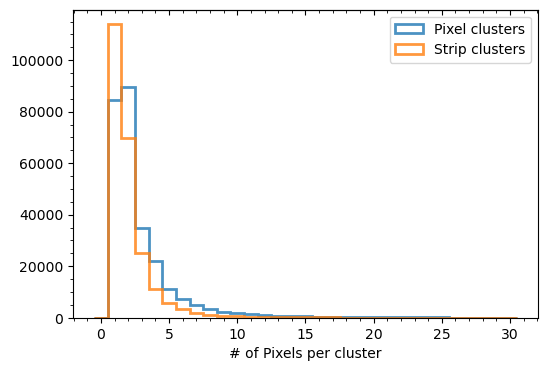

Charge information is not available for strip clusters


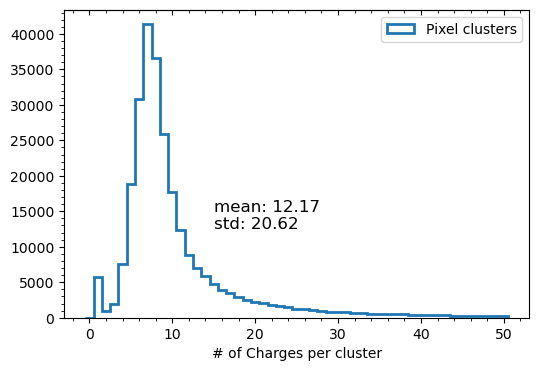

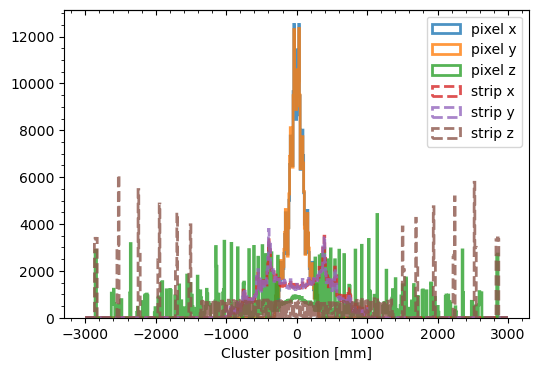

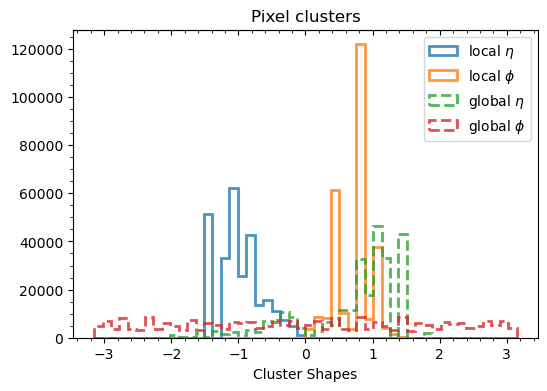

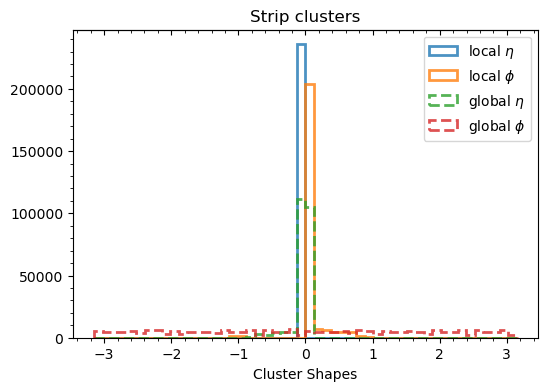

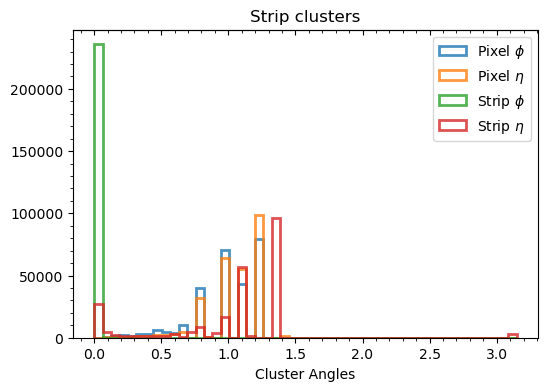

In [27]:
analyzer = TrackAnalyzer(new_dumped_2023_reader)
analyzer.study_cluster_features(evtid=0)

In [28]:
clusters = new_dumped_2023_reader.clusters

In [29]:
clusters.columns

Index(['cluster_id', 'module_id', 'cluster_x', 'cluster_y', 'cluster_z',
       'barrel_endcap', 'layer_disk', 'eta_module', 'phi_module', 'side',
       'pixel_count', 'charge_count', 'leta', 'lphi', 'localDir0', 'localDir1',
       'localDir2', 'lengthDir0', 'lengthDir1', 'lengthDir2', 'glob_eta',
       'glob_phi', 'eta_angle', 'phi_angle', 'norm_x', 'norm_y', 'norm_z',
       'hardware', 'subevent', 'barcode', 'particle_id'],
      dtype='object')

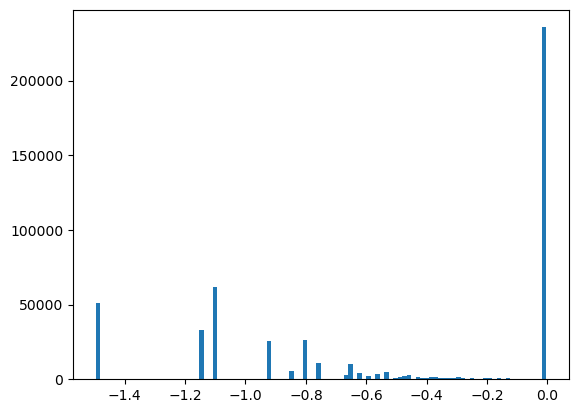

In [41]:
plt.hist(clusters.leta, bins=100);

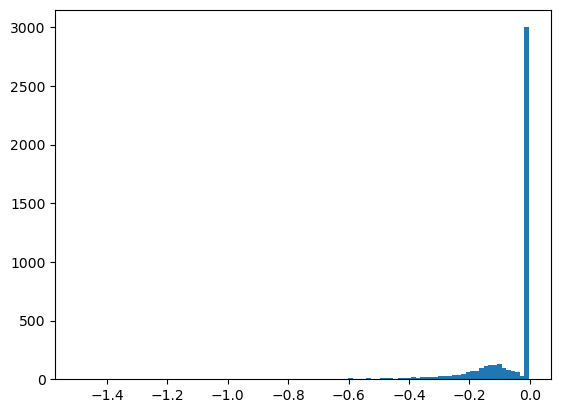

In [40]:
plt.hist(np.unique(clusters.leta), bins=100);

In [37]:
print(np.unique(clusters.leta))

[-1.4966115  -1.4920082  -1.1696607  ... -0.00353404 -0.00353154
 -0.00352904]
